In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from simpleparamaterisation import TPCevt as TPC
from scipy.stats import multivariate_normal

det = TPC.Detector("Simple TPC with Atmospheric Ar (default values)")

Welcome to JupyROOT 6.28/00


In [2]:
pitch_x = 0.1
pitch_y = 0.1
thresh = 1e-10
det.PSFstd = 1

def ReadoutGain(DriftedEvt):
    DriftedEvtGrid = np.stack(DriftedEvt, axis=-1)
    # print(DriftedEvt.min())
    minvals = np.array([DriftedEvtGrid[0].min(), DriftedEvtGrid[1].min()])
    maxvals = np.array([DriftedEvtGrid[0].max(), DriftedEvtGrid[1].max()])


    ReadoutGrid = np.mgrid[np.floor(minvals[0]):np.ceil(maxvals[0]):pitch_x,
                        np.floor(minvals[1]):np.ceil(maxvals[1]):pitch_y
                        ]

    pos = np.stack(ReadoutGrid, axis=-1)
    ReadoutEvt = None
    for i in range(len(DriftedEvt)):
        thisGain = np.random.exponential(scale=det.gain_mean)
        rv = multivariate_normal([DriftedEvt[i][0], DriftedEvt[i][1]], np.diag([det.PSFstd, det.PSFstd]))
        if ReadoutEvt is None:
            ReadoutEvt = rv.pdf(pos)*pitch_x*pitch_y*thisGain
        else:
            ReadoutEvt += rv.pdf(pos)*pitch_x*pitch_y*thisGain
    themask = ReadoutEvt >= thresh
    return pd.DataFrame({'x': ReadoutGrid[0][themask].flatten(),
                                    'y':ReadoutGrid[1][themask].flatten(),
                                    'Nel': ReadoutEvt[themask]
                                    })


def plotReadout(ReadoutEvt):
    plt.figure()
    plt.title('Previous Readout Function')
    plt.axis('equal')
    projectxy = pd.DataFrame(ReadoutEvt.groupby(['x','y'])['Nel'].sum()).reset_index()
    plt.scatter(projectxy.x,projectxy.y, c=projectxy.Nel, s=10)
    plt.colorbar().set_label('Nel')


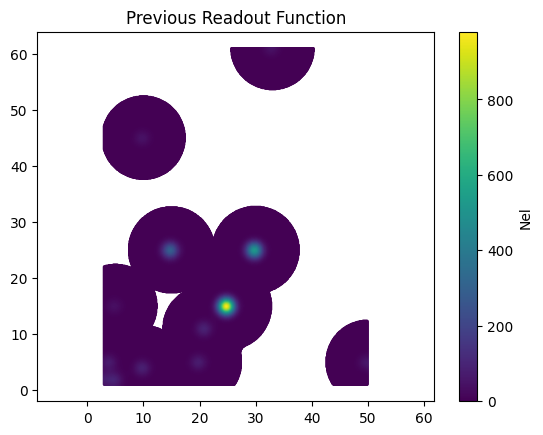

In [3]:
DriftedEvt = np.array([[5,1],[50,5],[5,15],[5,2], [20, 5], [30, 25], [15, 25], [25, 15], [10, 45], [33, 61], [21,11], [3,2], [4,5], [10,4]])

ReadoutEvt = ReadoutGain(DriftedEvt)
plt.figure()
plt.title('Previous Readout Function')
plt.axis('equal')
projectxy = pd.DataFrame(ReadoutEvt.groupby(['x','y'])['Nel'].sum()).reset_index()
plt.scatter(projectxy.x,projectxy.y, c=projectxy.Nel, s=1)
plt.colorbar().set_label('Nel')

In [4]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('ReadoutEvt', 2798636),
 ('projectxy', 2798636),
 ('DriftedEvt', 352),
 ('ReadoutGain', 152),
 ('open', 152),
 ('plotReadout', 152),
 ('TPC', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('det', 56),
 ('multivariate_normal', 56),
 ('pitch_x', 24),
 ('pitch_y', 24),
 ('thresh', 24)]

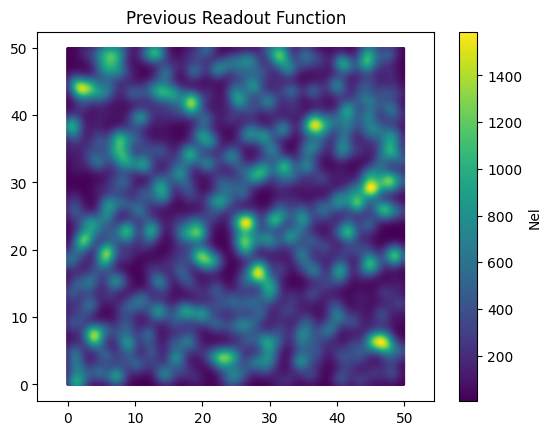

In [5]:
import numpy as np

N = 1000
min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.rand(N) * (max_x - min_x) + min_x
y_values = np.random.rand(N) * (max_y - min_y) + min_y

# Create the numpy array with the x and y values
DriftedEvt2 = np.array([x_values, y_values]).T

ReadoutEvt2 = ReadoutGain(DriftedEvt2)

plt.figure()
plt.title('Previous Readout Function')
plt.axis('equal')
projectxy = pd.DataFrame(ReadoutEvt2.groupby(['x','y'])['Nel'].sum()).reset_index()
plt.scatter(projectxy.x,projectxy.y, c=projectxy.Nel, s=1)
plt.colorbar().set_label('Nel')

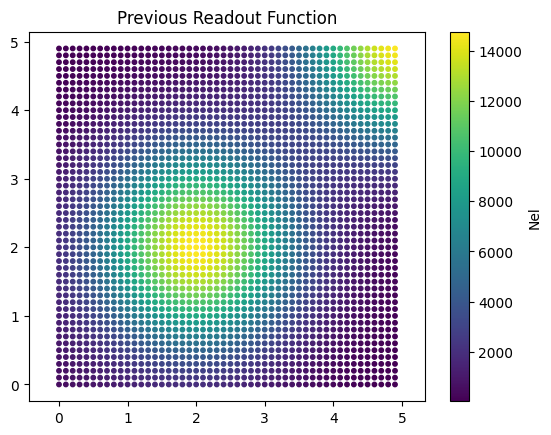

In [6]:
DriftedEvt = np.array([[5, 5], [0, 0]] + [[2, 2] for i in range(100)] + [[5,5] for i in range(100)])
ReadoutEvt2 = ReadoutGain(DriftedEvt)

plt.figure()
plt.title('Previous Readout Function')
plt.axis('equal')
projectxy = pd.DataFrame(ReadoutEvt2.groupby(['x','y'])['Nel'].sum()).reset_index()
plt.scatter(projectxy.x,projectxy.y, c=projectxy.Nel, s=10)
plt.colorbar().set_label('Nel')

[[38 29]
 [28 37]
 [14  1]
 [42 20]
 [ 7 32]
 [20 11]
 [38 21]
 [18 43]
 [22 24]
 [10 48]
 [10 26]
 [23 41]
 [35 27]
 [39 15]
 [23 14]
 [ 2 46]
 [21 50]
 [ 1 43]
 [23  2]
 [43 36]]


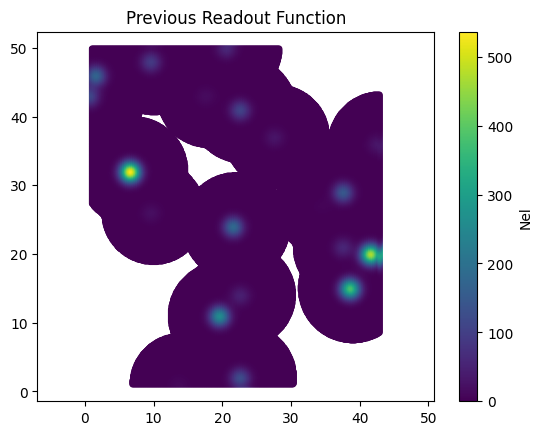

In [7]:
pitch_x = 0.1
pitch_y = 0.1
det.PSFstd = 1

N = 20

min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.randint(min_x, max_x + 1, size=N)
y_values = np.random.randint(min_y, max_y + 1, size=N)

# Create the numpy array with the x and y values
DriftedEvt = np.array([x_values, y_values]).T

print(DriftedEvt)
ReadoutEvt = ReadoutGain(DriftedEvt)
plotReadout(ReadoutEvt)

[[38 29]
 [28 37]
 [14  1]
 [42 20]
 [ 7 32]
 [20 11]
 [38 21]
 [18 43]
 [22 24]
 [10 48]
 [10 26]
 [23 41]
 [35 27]
 [39 15]
 [23 14]
 [ 2 46]
 [21 50]
 [ 1 43]
 [23  2]
 [43 36]]


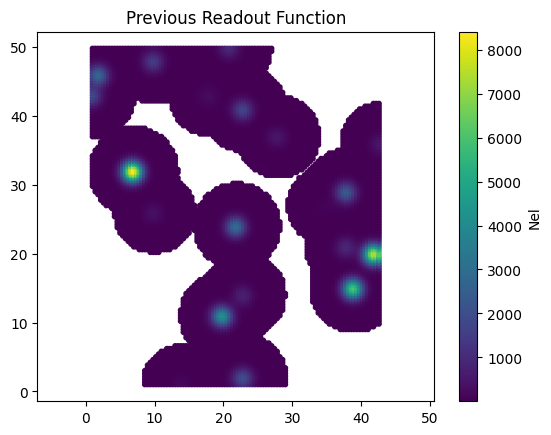

In [8]:
pitch_x = 0.4
pitch_y = 0.4
det.PSFstd = 1
thresh = 1e-5

N = 20

min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.randint(min_x, max_x + 1, size=N)
y_values = np.random.randint(min_y, max_y + 1, size=N)

# Create the numpy array with the x and y values
DriftedEvt = np.array([x_values, y_values]).T

print(DriftedEvt)
ReadoutEvt = ReadoutGain(DriftedEvt)
plotReadout(ReadoutEvt)

[[38  8]
 [28 25]
 [14  1]
 [42 19]
 [ 7 27]
 [20 46]
 [38  6]
 [18 43]
 [22  7]
 [10 46]
 [10 34]
 [23 13]
 [35 16]
 [39 35]
 [23 49]
 [ 2 39]
 [21  3]
 [ 1  1]
 [23  5]
 [43 41]
 [29  3]
 [37 28]
 [ 1 17]
 [20 25]
 [32 43]
 [11 33]
 [21  9]
 [43 35]
 [24 13]
 [48 30]
 [26 47]
 [41 14]
 [27  7]
 [15 13]
 [14 22]
 [46 39]
 [50 20]
 [43 15]
 [ 2 44]
 [36 17]
 [50 46]
 [ 6 23]
 [20 25]
 [ 8 24]
 [38 44]
 [17 40]
 [ 3 28]
 [24 14]
 [13 44]
 [49  0]]


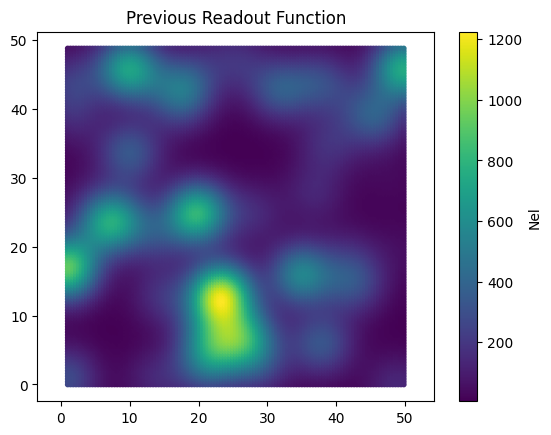

In [13]:
std = det.PSFstd = 10
pitch_x = 0.4
pitch_y = 0.4
thresh = 1e-5
rv = multivariate_normal([0,0], np.diag([std, std]))
N = 50

min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.randint(min_x, max_x + 1, size=N)
y_values = np.random.randint(min_y, max_y + 1, size=N)

# Create the numpy array with the x and y values
DriftedEvt = np.array([x_values, y_values]).T

print(DriftedEvt)
ReadoutEvt = ReadoutGain(DriftedEvt)
plotReadout(ReadoutEvt)

[[38  8]
 [28 25]
 [14  1]
 [42 19]
 [ 7 27]
 [20 46]
 [38  6]
 [18 43]
 [22  7]
 [10 46]
 [10 34]
 [23 13]
 [35 16]
 [39 35]
 [23 49]
 [ 2 39]
 [21  3]
 [ 1  1]
 [23  5]
 [43 41]
 [29  3]
 [37 28]
 [ 1 17]
 [20 25]
 [32 43]
 [11 33]
 [21  9]
 [43 35]
 [24 13]
 [48 30]
 [26 47]
 [41 14]
 [27  7]
 [15 13]
 [14 22]
 [46 39]
 [50 20]
 [43 15]
 [ 2 44]
 [36 17]
 [50 46]
 [ 6 23]
 [20 25]
 [ 8 24]
 [38 44]
 [17 40]
 [ 3 28]
 [24 14]
 [13 44]
 [49  0]]


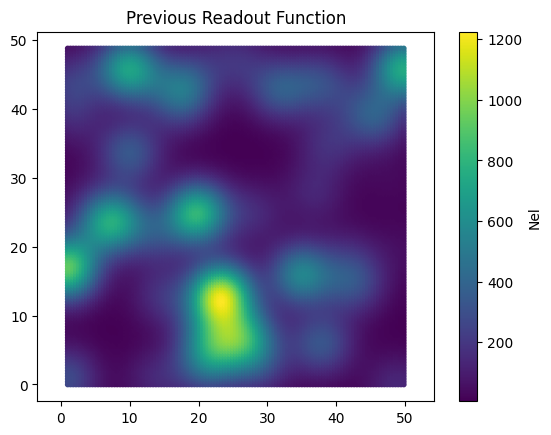

In [10]:
std = det.PSFstd = 10
pitch_x = 0.4
pitch_y = 0.4
thresh = 1e-5
rv = multivariate_normal([0,0], np.diag([std, std]))
N = 50

min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.randint(min_x, max_x + 1, size=N)
y_values = np.random.randint(min_y, max_y + 1, size=N)

# Create the numpy array with the x and y values
DriftedEvt = np.array([x_values, y_values]).T

print(DriftedEvt)
ReadoutEvt = ReadoutGain(DriftedEvt)
plotReadout(ReadoutEvt)

[[18.72700594 48.47923139]
 [47.53571532 38.75664117]
 [36.59969709 46.97494708]
 [29.93292421 44.74136752]
 [ 7.80093202 29.89499894]
 [ 7.79972602 46.09371175]
 [ 2.90418061  4.4246251 ]
 [43.30880729  9.79914312]
 [30.05575059  2.26136445]
 [35.40362889 16.26651654]
 [ 1.02922471 19.43386448]
 [48.49549261 13.56745159]
 [41.62213204 41.43687546]
 [10.61695553 17.83766633]
 [ 9.09124836 14.04672548]
 [ 9.17022549 27.13480416]
 [15.21211215  7.04621125]
 [26.23782158 40.10984904]
 [21.59725093  3.72753218]
 [14.56145701 49.34434683]
 [30.59264474 38.61223846]
 [ 6.97469303  9.93578408]
 [14.60723243  0.27610586]
 [18.31809216 40.77307142]
 [22.80349921 35.34286719]
 [39.25879807 36.4503584 ]
 [ 9.98368911 38.56351733]
 [25.71172192  3.70223259]
 [29.62072844 17.92328643]
 [ 2.32252064  5.79345298]
 [30.3772426  43.15517129]
 [ 8.52620618 31.16490634]
 [ 3.25257965 16.54490124]
 [47.44427686  3.17791751]
 [48.28160165 15.54911609]
 [40.41986741 16.2591661 ]
 [15.23068846 36.48030892]
 

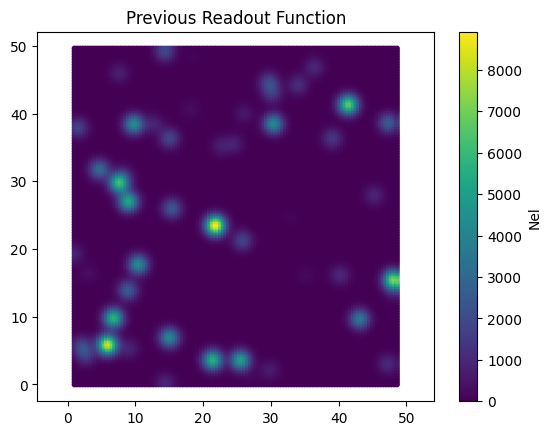

In [14]:
std = det.PSFstd = 1
pitch_x = 0.4
pitch_y = 0.4
thresh = 1e-50
rv = multivariate_normal([0,0], np.diag([std, std]))
N = 50

min_x, max_x = 0, 50
min_y, max_y = 0, 50
# Set a seed for reproducibility
np.random.seed(42)

# Generate random x and y values within the given range
x_values = np.random.rand(N) * (max_x - min_x) + min_x
y_values = np.random.rand(N) * (max_y - min_y) + min_y

# Create the numpy array with the x and y values
DriftedEvt = np.array([x_values, y_values]).T

print(DriftedEvt)
ReadoutEvt = ReadoutGain(DriftedEvt)
plotReadout(ReadoutEvt)

In [12]:
import numpy as np

# Given data
x_1 = np.array([1.1, 2.2, 3.2])
y_1 = np.array([1, 2, 3])
val_1 = np.array([5, 5, 5])

x_2 = np.array([3, 4, 5])
y_2 = np.array([3, 4, 5])
val_2 = np.array([10, 10, 10])

# Combine x, y, and val values from both datasets
xtotal = np.concatenate((x_1, x_2))
ytotal = np.concatenate((y_1, y_2))
vtotal = np.concatenate((val_1, val_2))

# Use np.unique to group by x and y coordinates and sum the corresponding values
unique_indices, inverse_indices, unique_counts = np.unique(
    np.column_stack((xtotal, ytotal)), axis=0, return_inverse=True, return_counts=True
)
vtotal_combined = np.add.reduceat(vtotal, np.cumsum(unique_counts) - unique_counts)

xtotal_combined, ytotal_combined = unique_indices.T

print("xtotal:", xtotal_combined)
print("ytotal:", ytotal_combined)
print("vtotal:", vtotal_combined)


xtotal: [1.1 2.2 3.  3.2 4.  5. ]
ytotal: [1. 2. 3. 3. 4. 5.]
vtotal: [ 5  5  5 10 10 10]
